## Arima Exercise

In [1]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# load data
df = pd.read_csv('https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv',
                 parse_dates = ['Month'], 
                 index_col = ['Month'])\
       .rename(columns={'#Passengers':'Passengers'})

**Task:** Print the top 5 rows.

In [3]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


**Task:** Create the function called `plot_timeseries(df)`.

In [6]:
def plot_timeseries(df):
    df.plot()
    plt.show()

**Task:** Plot the time series from above.

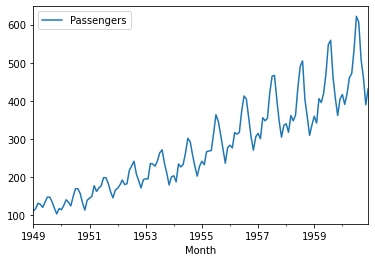

In [8]:
plot_timeseries(df)

In [ ]:
from statsmodels.tsa.stattools import adfuller

def ADF_Stationarity_Test(timeseries, significance_level):
    X = timeseries.values
    result = adfuller(X)
    p_value = result[1]
    print('p_value', p_value)
    if (p_value > significance_level):
        print("time series is non-stationary")
    else:
        print("time series is stationary")

In [24]:
df['passengers_diff'] = df['Passengers']- df['Passengers'].shift(1)
ADF_Stationarity_Test(df['passengers_diff'].dropna(), 0.05)

p_value 0.05421329028382468
time series is non-stationary


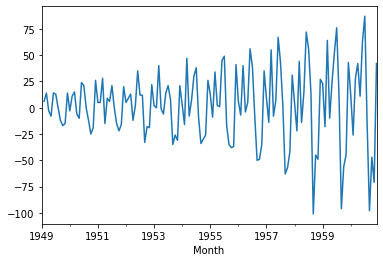

In [28]:
plot_timeseries(df['passengers_diff'])

In [25]:
df['passengers_diff2'] = df['passengers_diff']- df['passengers_diff'].shift(1)
ADF_Stationarity_Test(df['passengers_diff2'].dropna(), 0.05)

p_value 2.732891850014085e-29
time series is stationary


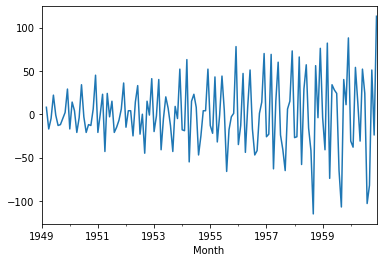

In [29]:
plot_timeseries(df['passengers_diff2'])

In [ ]:
# d=2

**Task:** Compute the rolling mean and the rolling std with an appropriate window size.

In [94]:
rolling_mean = df['Passengers'].rolling(window = 12).mean()
rolling_std = df['Passengers'].rolling(window = 12).std()
# plot all together 

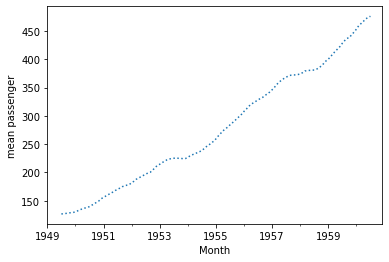

In [67]:
df['rolling_mean'].plot(style=[':', '--', '-'])
plt.ylabel('mean passenger');

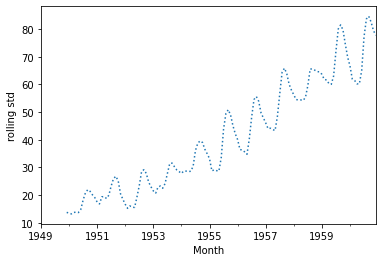

In [97]:
rolling_std.plot(style=[':', '--', '-'])
plt.ylabel('rolling std');

**Task:** Test the stationarity of all the time series

In [69]:
ADF_Stationarity_Test(df['rolling_mean'].dropna(), 0.05)

p_value 0.9927372598211598
time series is non-stationary


In [73]:
ADF_Stationarity_Test(df['rolling_std'].dropna(), 0.05)

p_value 0.9971928003740416
time series is non-stationary


**Task:** Perform a log transformation on the original time series. 

In [26]:
df['passengers_log'] = np.log(df['Passengers'])

In [74]:
ADF_Stationarity_Test(df['passengers_log'].dropna(), 0.05)

p_value 0.4223667747703909
time series is non-stationary


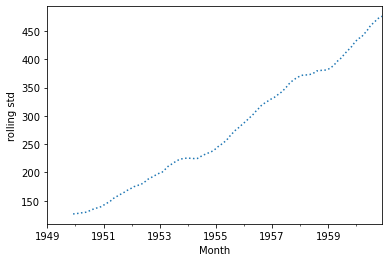

In [95]:
rolling_mean.plot(style=[':', '--', '-'])
plt.ylabel('rolling std');

**Task:** Plot the transformed time series.

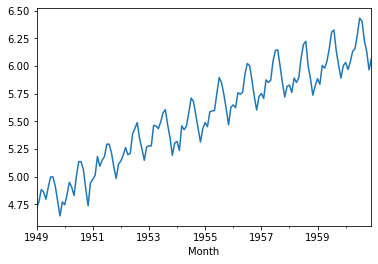

In [30]:
plot_timeseries(df['passengers_log'])

**Task:** Test the stationarity of the transformed time series. If it isn't stationary, try a different transformation technique. 

In [31]:
ADF_Stationarity_Test(df['passengers_log'].dropna(), 0.05)

p_value 0.4223667747703909
time series is non-stationary


In [ ]:
# Acheive stationarity by 
#log 
#calculate rolling mean
# subtract rolling
# dropna
# check stationary

# OR
# shift
# df_log - df_log.shift()

In [98]:
df['transformed'] = df['passengers_log'] - rolling_mean

In [99]:
ADF_Stationarity_Test(df['transformed'].dropna(), 0.05)

p_value 0.9921114303164101
time series is non-stationary


In [100]:
# try other way
df['transformed'] = df['passengers_log'] - df['passengers_log'].shift()

In [101]:
ADF_Stationarity_Test(df['transformed'].dropna(), 0.05)

p_value 0.0711205481508599
time series is non-stationary


**Task:** Use the stationary time series and find the optimal `(p, d, q)` parameters of ARIMA model.

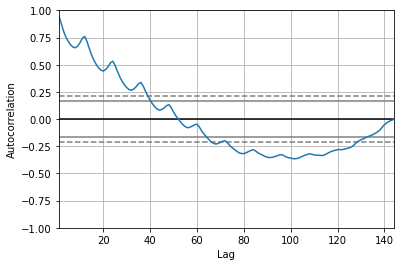

In [104]:
# Autocorrelation plot
from pandas.plotting import autocorrelation_plot
 
# autocorrelation_plot(df['transformed'])
autocorrelation_plot(df['Passengers'])
plt.show()
# q = 38? - BUT SHOULD BE 2

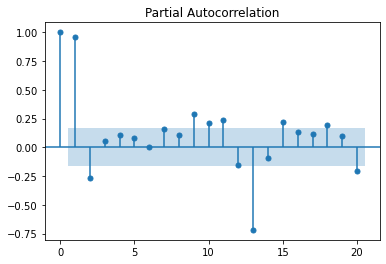

In [37]:
# partial Autocorrelation plot
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
# series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0)
plot_pacf(df['Passengers'], lags=20)
pyplot.show()

p=2

/Users/lilakelland/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/lilakelland/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was p

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.66135D+00    |proj g|=  4.80020D-02

At iterate    5    f=  4.65907D+00    |proj g|=  3.27020D-02

At iterate   10    f=  4.65821D+00    |proj g|=  1.03215D-03

At iterate   15    f=  4.65802D+00    |proj g|=  1.51639D-03

At iterate   20    f=  4.65768D+00    |proj g|=  1.24672D-02

At iterate   25    f=  4.65750D+00    |proj g|=  1.65459D-03

At iterate   30    f=  4.65750D+00    |proj g|=  4.89386D-04

At iterate   35    f=  4.65749D+00    |proj g|=  4.12115D-05

At iterate   40    f=  4.65749D+00    |proj g|=  1.07470D-05

At iterate   45    f=  4.65749D+00    |proj g|=  5.77316D-06

At iterate   50    f=  4.65749D+00    |proj g|=  3.01981D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

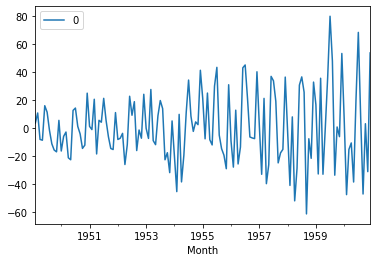

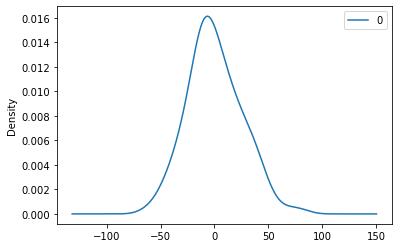

In [107]:
# fit model
model = ARIMA(df['Passengers'], order=(2,1,2)) # got this from mentor - but my d is 2??
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()

# summary stats of residuals
# print(residuals.describe())

**Task:** Plot the predictions (not transformed to the original scale).

/Users/lilakelland/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.33933D+00    |proj g|=  5.85263D-02

At iterate    5    f=  4.33229D+00    |proj g|=  6.38492D-02

At iterate   10    f=  4.32704D+00    |proj g|=  3.75877D-04

At iterate   15    f=  4.32702D+00    |proj g|=  7.68274D-05

At iterate   20    f=  4.32702D+00    |proj g|=  7.46070D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     32      1     0     0   5.240D-06   4.327D+00
  F =   4.3270244997140841     

CONVERG

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



At iterate   25    f=  4.33238D+00    |proj g|=  5.72165D-04

At iterate   30    f=  4.33237D+00    |proj g|=  7.03437D-05
  ys=-3.400E-16  -gs= 8.474E-17 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     92      2     1     0   6.395D-06   4.332D+00
  F =   4.3323745235188866     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.40393D+00    |proj g|=  2.39280D-02



/Users/lilakelland/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
 This problem is unconstrained.


At iterate    5    f=  4.39644D+00    |proj g|=  4.59313D-03

At iterate   10    f=  4.39372D+00    |proj g|=  6.42308D-02

At iterate   15    f=  4.38212D+00    |proj g|=  2.15445D-03

At iterate   20    f=  4.38211D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     36      1     0     0   8.882D-07   4.382D+00
  F =   4.3821099234494847     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At itera

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.42684D+00    |proj g|=  1.86192D-02

At iterate    5    f=  4.41985D+00    |proj g|=  4.57971D-03

At iterate   10    f=  4.41796D+00    |proj g|=  2.04610D-03

At iterate   15    f=  4.41784D+00    |proj g|=  3.66729D-04

At iterate   20    f=  4.41783D+00    |proj g|=  4.65405D-05

At iterate   25    f=  4.41783D+00    |proj g|=  7.90479D-06

At iterate   30    f=  4.41783D+00    |proj g|=  5.77316D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  4.44998D+00    |proj g|=  2.30429D-03

At iterate   10    f=  4.44805D+00    |proj g|=  3.98970D-03

At iterate   15    f=  4.44795D+00    |proj g|=  4.33964D-04

At iterate   20    f=  4.44794D+00    |proj g|=  8.89955D-05

At iterate   25    f=  4.44794D+00    |proj g|=  2.62901D-05

At iterate   30    f=  4.44794D+00    |proj g|=  1.15463D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     46      1     0     0   1.776D-07   4.448D+00
  F =   4.4479351569303098     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  4.47021D+00    |proj g|=  1.10134D-05

At iterate   30    f=  4.47021D+00    |proj g|=  7.28306D-06

At iterate   35    f=  4.47021D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     49      1     0     0   1.776D-07   4.470D+00
  F =   4.4702067980893752     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.47591D+00    |proj g|=  7.09770D-03

At iter

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate   40    f=  4.47677D+00    |proj g|=  1.77636D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     63      1     0     0   1.776D-06   4.477D+00
  F =   4.4767708954183885     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.48558D+00    |proj g|=  1.13810D-02

At iterate    5    f=  4.48026D+00    |proj g|=  5.08571D-03

At iterate   10    f=  4.47784D+00    |proj g|=  4.87788D-04

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  4.42626D+00    |proj g|=  3.56248D-04

At iterate   15    f=  4.42625D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     22      1     0     0   8.882D-08   4.426D+00
  F =   4.4262540147345506     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.42620D+00    |proj g|=  5.18269D-02

At iterate    5    f=  4.42293D+00    |proj g|=  3.10966D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.49626D+00    |proj g|=  6.20926D-03

At iterate   10    f=  4.49437D+00    |proj g|=  2.45892D-03

At iterate   15    f=  4.49420D+00    |proj g|=  7.42695D-04

At iterate   20    f=  4.49418D+00    |proj g|=  1.10667D-04

At iterate   25    f=  4.49418D+00    |proj g|=  1.44773D-05

At iterate   30    f=  4.49418D+00    |proj g|=  4.44089D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     45      1     0     0   8.882D-08   4.494D+00
  F =   4.4941797544715998     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  4.49583D+00    |proj g|=  1.14220D-04

At iterate   25    f=  4.49583D+00    |proj g|=  2.02505D-05

At iterate   30    f=  4.49583D+00    |proj g|=  3.55271D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     41      1     0     0   1.599D-06   4.496D+00
  F =   4.4958288254077221     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.50807D+00    |proj g|=  2.04551D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.52505D+00    |proj g|=  1.41542D-02

At iterate    5    f=  4.51956D+00    |proj g|=  4.12399D-03

At iterate   10    f=  4.51755D+00    |proj g|=  6.81233D-03

At iterate   15    f=  4.51724D+00    |proj g|=  7.09743D-04

At iterate   20    f=  4.51722D+00    |proj g|=  1.67866D-04

At iterate   25    f=  4.51722D+00    |proj g|=  7.10543D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     43      1     0     0   

 This problem is unconstrained.



At iterate   30    f=  4.54103D+00    |proj g|=  6.12843D-06

At iterate   35    f=  4.54103D+00    |proj g|=  2.66454D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     49      1     0     0   8.882D-08   4.541D+00
  F =   4.5410303201612621     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.52083D+00    |proj g|=  6.42161D-02

At iterate    5    f=  4.51718D+00    |proj g|=  2.33277D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.57705D+00    |proj g|=  1.38213D-02

At iterate    5    f=  4.57209D+00    |proj g|=  3.97646D-03

At iterate   10    f=  4.56978D+00    |proj g|=  2.34825D-03

At iterate   15    f=  4.56966D+00    |proj g|=  3.65663D-04

At iterate   20    f=  4.56965D+00    |proj g|=  1.70530D-05

At iterate   25    f=  4.56965D+00    |proj g|=  2.67342D-05

At iterate   30    f=  4.56965D+00    |proj g|=  1.59872D-06

At iterate   35    f=  4.56965D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.51540D+00    |proj g|=  6.21599D-02

At iterate    5    f=  4.51226D+00    |proj g|=  1.48632D-02

At iterate   10    f=  4.51030D+00    |proj g|=  9.76996D-04

At iterate   15    f=  4.51028D+00    |proj g|=  4.44089D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     23      1     0     0   7.105D-07   4.510D+00
  F =   4.5102755695077503     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  4.51985D+00    |proj g|=  6.37268D-04

At iterate   20    f=  4.51984D+00    |proj g|=  9.53015D-05

At iterate   25    f=  4.51984D+00    |proj g|=  6.21725D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     44      1     0     0   1.954D-06   4.520D+00
  F =   4.5198441019980446     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.53195D+00    |proj g|=  5.70025D-02

At iter

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/lilakelland/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     76      2     0     0   4.441D-07   4.527D+00
  F =   4.5274023082191404     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.53644D+00    |proj g|=  6.15665D-02

At iterate    5    f=  4.53293D+00    |proj g|=  2.99544D-02

At iterate   10    f=  4.53197D+00    |proj g|=  5.24256D-03

At iterate   15    f=  4.53139D+00    |proj g|=  2.09974D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.53227D+00    |proj g|=  6.14357D-02

At iterate    5    f=  4.52882D+00    |proj g|=  2.99817D-02

At iterate   10    f=  4.52786D+00    |proj g|=  4.71259D-03

At iterate   15    f=  4.52729D+00    |proj g|=  1.42784D-03

At iterate   20    f=  4.52721D+00    |proj g|=  3.31468D-04

At iterate   25    f=  4.52721D+00    |proj g|=  1.77636D-06

At iterate   30    f=  4.52721D+00    |proj g|=  9.76996D-07
  ys=-1.519E-12  -gs= 1.510E-13 BFGS update SKIPPED

At iterate   35    f=  4.52721D+00    |proj g|=  7.10543D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of 

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.54056D+00    |proj g|=  6.05350D-02

At iterate    5    f=  4.53732D+00    |proj g|=  3.20473D-02

At iterate   10    f=  4.53633D+00    |proj g|=  2.09726D-03

At iterate   15    f=  4.53594D+00    |proj g|=  1.55786D-03

At iterate   20    f=  4.53592D+00    |proj g|=  6.37712D-05

At iterate   25    f=  4.53592D+00    |proj g|=  4.44089D-07
  ys=-1.225E-11  -gs= 4.998E-12 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Proj


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/lilakelland/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     61      2     0     0   3.197D-06   4.582D+00
  F =   4.5822320209196841     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.59400D+00    |proj g|=  4.01762D-02

At iterate    5    f=  4.59019D+00    |proj g|=  6.90941D-03

At iterate   10    f=  4.58833D+00    |proj g|=  4.02380D-03

At iterate   15    f=  4.58804D+00    |proj g|=  3.64331D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/lilakelland/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     51      2     0     0   1.421D-06   4.598D+00
  F =   4.5984252862998378     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.59912D+00    |proj g|=  5.46257D-02

At iterate    5    f=  4.59659D+00    |proj g|=  3.71205D-02

At iterate   10    f=  4.59442D+00    |proj g|=  7.75024D-04

At iterate   15    f=  4.59438D+00    |proj g|=  8.88178D-07

       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.59257D+00    |proj g|=  3.81736D-02

At iterate   10    f=  4.59061D+00    |proj g|=  7.50244D-04

At iterate   15    f=  4.59056D+00    |proj g|=  4.35207D-06

At iterate   20    f=  4.59056D+00    |proj g|=  4.44089D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     29      1     0     0   4.441D-07   4.591D+00
  F =   4.5905615181675117     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60478D+00    |proj g|=  5.08648D-02

At iterate    5    f=  4.60239D+00    |proj g|=  6.09468D-03

At iterate   10    f=  4.60173D+00    |proj g|=  1.02176D-03

At iterate   15    f=  4.60173D+00    |proj g|=  2.36255D-05

At iterate   20    f=  4.60173D+00    |proj g|=  8.26006D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     63      2     0     0   8.260D-06   4.602D+00
  F =   4.6017264758750285     

ABNORMA


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/lilakelland/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.



At iterate   10    f=  4.61493D+00    |proj g|=  4.92406D-04

At iterate   15    f=  4.61491D+00    |proj g|=  1.83498D-04

At iterate   20    f=  4.61491D+00    |proj g|=  1.86517D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     27      1     0     0   2.487D-06   4.615D+00
  F =   4.6149092935017313     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.61538D+00    |proj g|=  4.85492D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.61156D+00    |proj g|=  4.59388D-02

At iterate    5    f=  4.60964D+00    |proj g|=  2.68501D-02

At iterate   10    f=  4.60863D+00    |proj g|=  2.96208D-04

At iterate   15    f=  4.60862D+00    |proj g|=  1.22569D-05

At iterate   20    f=  4.60862D+00    |proj g|=  7.10543D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     26      1     0     0   7.105D-07   4.609D+00
  F =   4.6086226965612118     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.61556D+00    |proj g|=  4.43269D-02

At iterate    5    f=  4.61364D+00    |proj g|=  3.19818D-02

At iterate   10    f=  4.61279D+00    |proj g|=  4.48619D-04

At iterate   15    f=  4.61278D+00    |proj g|=  2.08722D-05

At iterate   20    f=  4.61278D+00    |proj g|=  1.12799D-05

At iterate   25    f=  4.61278D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     35      1     0     0   

 This problem is unconstrained.



At iterate   20    f=  4.63847D+00    |proj g|=  2.33324D-04

At iterate   25    f=  4.63847D+00    |proj g|=  7.81597D-05

At iterate   30    f=  4.63847D+00    |proj g|=  8.80185D-05

At iterate   35    f=  4.63847D+00    |proj g|=  2.92211D-05

At iterate   40    f=  4.63847D+00    |proj g|=  6.92779D-06

At iterate   45    f=  4.63847D+00    |proj g|=  3.46390D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     83      1     0     0   2.487D-06   4.638D+00
  F =   4.6384652054094069     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f=  4.63842D+00    |proj g|=  4.35482D-02

At iterate   10    f=  4.63554D+00    |proj g|=  1.35536D-03

At iterate   15    f=  4.63484D+00    |proj g|=  2.06342D-03

At iterate   20    f=  4.63470D+00    |proj g|=  3.61577D-04

At iterate   25    f=  4.63469D+00    |proj g|=  6.64446D-04

At iterate   30    f=  4.63469D+00    |proj g|=  9.96536D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     60      1     0     0   3.553D-05   4.635D+00
  F =   4.6346895912075903     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  4.64813D+00    |proj g|=  4.23128D-02

At iterate   10    f=  4.64634D+00    |proj g|=  6.21991D-04

At iterate   15    f=  4.64610D+00    |proj g|=  4.63452D-03

At iterate   20    f=  4.64601D+00    |proj g|=  3.19211D-04

At iterate   25    f=  4.64600D+00    |proj g|=  1.51879D-04

At iterate   30    f=  4.64600D+00    |proj g|=  1.12799D-05

At iterate   35    f=  4.64600D+00    |proj g|=  3.80140D-05

At iterate   40    f=  4.64600D+00    |proj g|=  1.20792D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     65      1     0     0   1.208D-05   4.646D+00
  F =   4.64600384284

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    5    f=  4.64457D+00    |proj g|=  4.30538D-02

At iterate   10    f=  4.64278D+00    |proj g|=  7.74936D-04

At iterate   15    f=  4.64240D+00    |proj g|=  3.42091D-03

At iterate   20    f=  4.64233D+00    |proj g|=  4.53948D-04

At iterate   25    f=  4.64232D+00    |proj g|=  1.73106D-04

At iterate   30    f=  4.64232D+00    |proj g|=  1.58362D-04

At iterate   35    f=  4.64232D+00    |proj g|=  4.08562D-05

At iterate   40    f=  4.64232D+00    |proj g|=  2.50466D-05

At iterate   45    f=  4.64232D+00    |proj g|=  6.48370D-06

At iterate   50    f=  4.64232D+00    |proj g|=  4.44089D-06

At iterate   55    f=  4.64232D+00    |proj g|=  2.66454D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


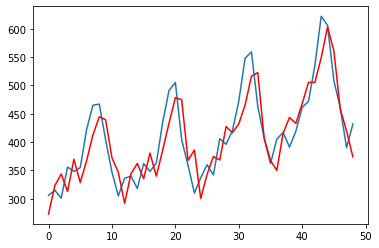

In [112]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# split into train and test sets
X = df['Passengers'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,2))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

**Task:** Plot the predictions (transformed to the original scale).

In [ ]:
# ??

**Task:** Plot the predictions for the next 10 years. How accurate do you think your model is predicting that far in the future? 